In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

In [2]:
def print_graph(nlist,slist):
    figure(figsize=(15, 8))
    X=[]
    Y=[]
    for i in range(len(nlist)):
        for j in range(len(nlist[i])):
            X.append(nlist[i][j][0])
            Y.append(nlist[i][j][1])
            plt.annotate((i, j),(nlist[i][j][0],nlist[i][j][1]))
            plt.plot(nlist[i][j][0],nlist[i][j][1],'*r')
    Xp=[]
    Yp=[]
    for n in slist:
        Xp.append(n[0])
        Yp.append(n[1])
    plt.plot(Xp,Yp,'.')
    plt.show()

In [3]:
def check_new(new):
    if new[0]>1:
        new[0]=1
    if new[0]<0:
        new[0]=0
    if new[1]>1:
        new[1]=1
    if new[1]<0:
        new[1]=0
    return new

In [4]:
def make_nlist():
    nueron_lst = []
    row = []
    xarr = np.arange(9)
    xarr = np.true_divide(xarr, 9)
    xarr = np.append(xarr, 1)
    
    yarr = np.arange(9)
    yarr = np.true_divide(yarr, 9)
    yarr = np.append(yarr, 1)
    for j in range(10):
        row = []
        for i in range(len(xarr)):
            row.append([xarr[i] ,yarr[j]])
        nueron_lst.append(row)
    return nueron_lst

In [5]:
def SOM(data):
    nueron_lst=make_nlist()
    mid = 10
    num = 5
    alpha = 0.5
    
    ker = cv2.getGaussianKernel(mid * 2 + 1,-1)
    ker = ker.dot(ker.T)
    
    sampled_points = []
    for i in range(25):
        print("iteration ",i )
        print_graph(nueron_lst, sampled_points)
        if i > 0 and i % 5 == 0:
            num -= 1
        sampled_points = []
        data = data.sample(frac=1)
        for index, row in data.iterrows():
            sampled_points.append(np.array([row[0], row[1]]))
            small_dist = np.inf

            # find closest nueron
            for n in range(len(nueron_lst)):
                for r in range(len(nueron_lst[n])):
                    dist = np.sqrt((row[0] - nueron_lst[n][r][0]) ** 2 + (row[1] - nueron_lst[n][r][1]) ** 2)
                    if dist < small_dist:
                        small_dist = dist
                        spot = (n, r)
                        
            # update weights of nuerons
#             new = nueron_lst[spot[0]][spot[1]] + alpha * ker[mid][mid] * (sampled_points[-1] - nueron_lst[spot[0]][spot[1]])
#             new = check_new(new)
#             nueron_lst[spot[0]][spot[1]] = new
            
            # update weights 
            mid_j = 5
            for j in range(spot[0] - num, spot[0] + num + 1):
                mid_k = 5
                for k in range(spot[1] - num, spot[1] + num + 1):
                    if 0 <= j < len(nueron_lst) and 0 <= k < len(nueron_lst[j]):
#                         print(spot, j, k)
#                         if j == spot[0] and k == spot[1]:
#                             print(mid_j, mid_k)
                        new = nueron_lst[j][k] + alpha * ker[mid_j][mid_k] * (sampled_points[-1] - nueron_lst[j][k])
                        nueron_lst[j][k] = new
                    
                    mid_k += 1
                mid_j += 1

    print("iteration ",i )
    print_graph(nueron_lst,sampled_points)

In [6]:
nueron_lst = make_nlist()
# X = []
# Y = []
# for n in nueron_lst:
#     for r in n:
#         X.append(r[0])
#         Y.append(r[1])
# figure(figsize=(15, 8))
# # plt.plot(X,Y)
# plt.plot(X,Y,"*r")
# plt.show()

In [7]:
data = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data[i] = [randX, randY]
data = data.T
# X=[]
# Y=[]
# for index,row in data.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(15, 8))
# # plt.plot(X,Y)
# plt.plot(X,Y,"*r")
# plt.show()

iteration  0


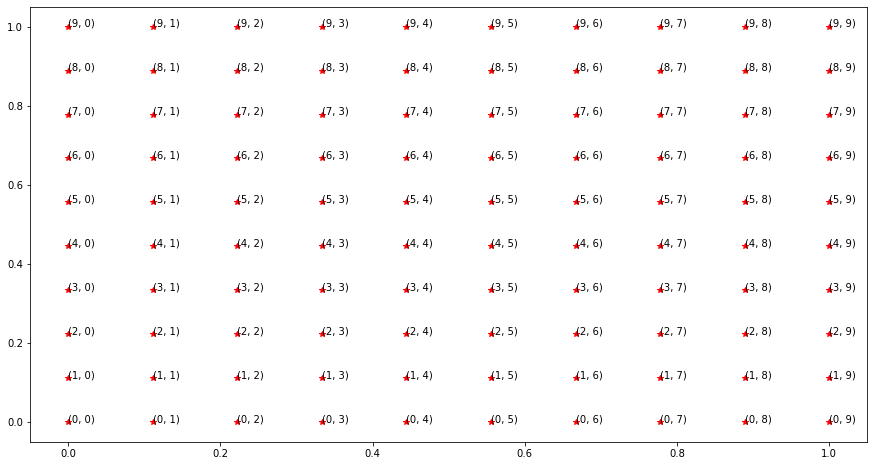

iteration  1


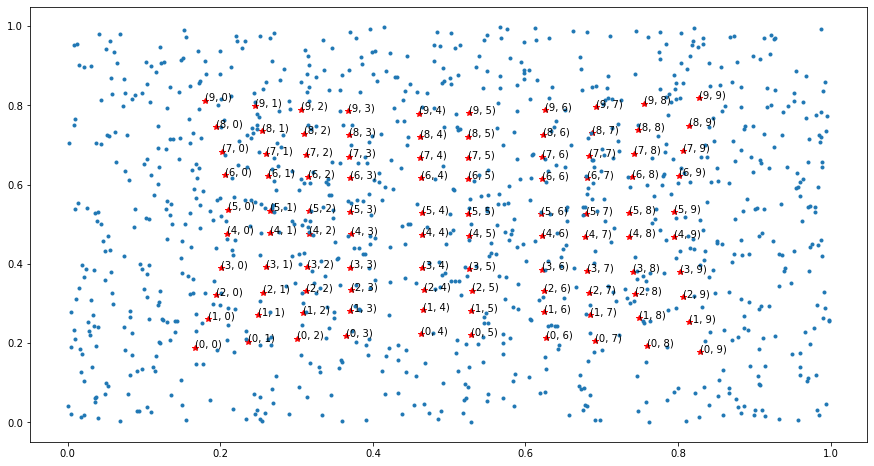

iteration  2


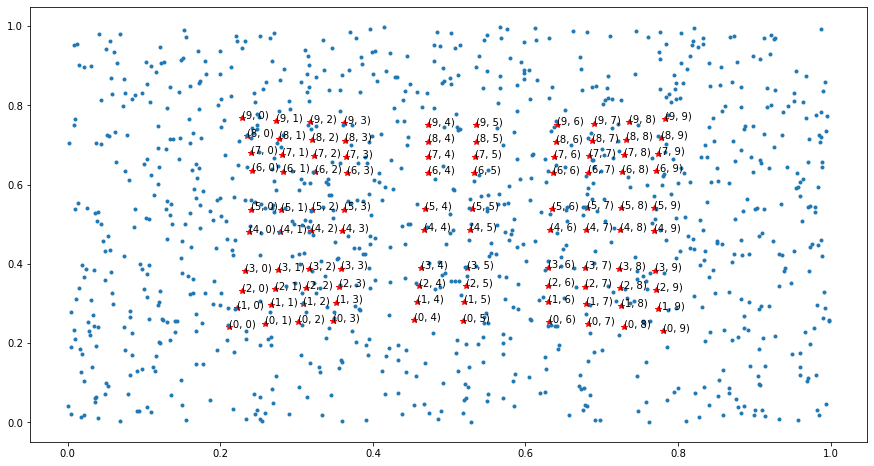

KeyboardInterrupt: 

In [8]:
SOM(data)

In [ ]:
data5 = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX <= 0.5:
        randX = randX ** 2
    else:
        randX = randX ** 0.5
    if randY <= 0.5:
        randY = randY ** 2
    else:
        randY = randY ** 0.5
    data5[i] = [randX, randY]
data5 = data5.T
# X = []
# Y = []
# for index,row in data5.iterrows():
#     X.append(row[0])
#     Y.append(row[1])
# figure(figsize=(15, 8))
# # plt.plot(X,Y)
# plt.plot(X,Y,"ro")
# plt.show()

In [ ]:
SOM(data5)